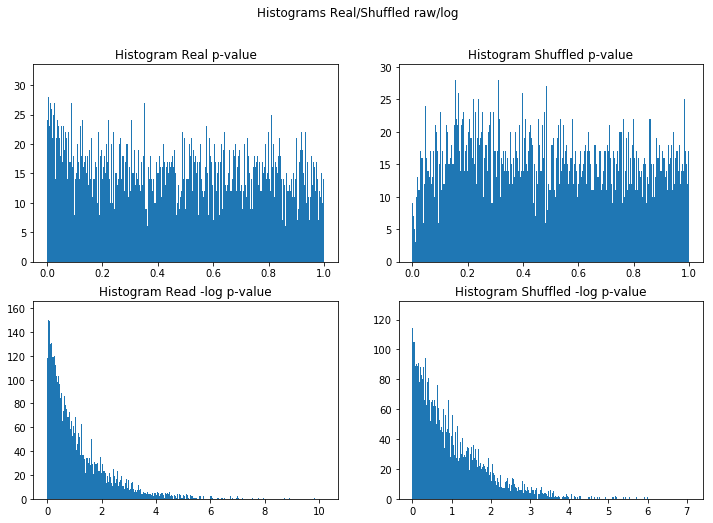

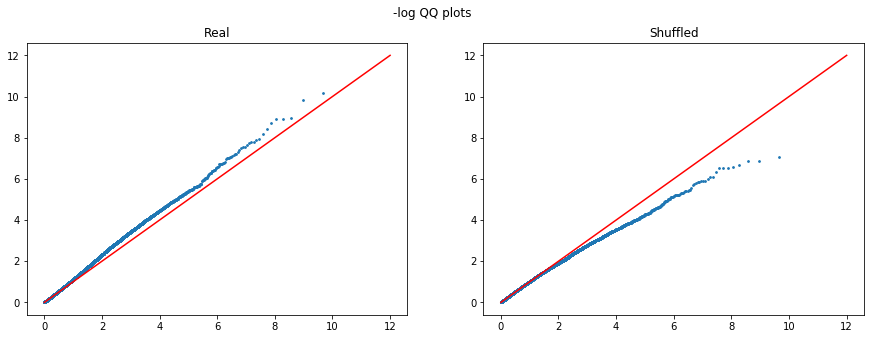

In [16]:

import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr
%matplotlib inline

real_pvalues = np.array(pickle.load(open('../data/processed/associations/lung_associations_pvalues/0_pvalues_shuffle0_filterlimit1.py','rb')))
shuffled_pvalues = np.array(pickle.load(open('../data/processed/associations/lung_associations_pvalues/0_pvalues_shuffle1_filterlimit1.py','rb')))
[X_matrix, y_pheno] = pickle.load(open('../data/processed/associations/lung_associations.py','rb'))

f,a = plt.subplots(2,2, figsize=(12,8))
f.suptitle("Histograms Real/Shuffled raw/log")
a[0][0].set_title("Histogram Real p-value")
a[0][0].hist([x for x in real_pvalues],bins=1000)
a[0][1].set_title("Histogram Shuffled p-value")
a[0][1].hist([x for x in shuffled_pvalues],bins=1000)
a[1][0].set_title("Histogram Read -log p-value")
a[1][0].hist([-math.log(x) for x in real_pvalues],bins=1000)
a[1][1].set_title("Histogram Shuffled -log p-value")
a[1][1].hist([-math.log(x) for x in shuffled_pvalues],bins=1000)
plt.show()

sorted_real_indexes = np.argsort(real_pvalues)
sorted_real_pvalues = real_pvalues[sorted_real_indexes]
sorted_shuffled_indexes = np.argsort(shuffled_pvalues)
sorted_shuffled_pvalues = shuffled_pvalues[sorted_shuffled_indexes]


sample_real = sorted_real_pvalues
expected_real = np.linspace(1/len(sorted_real_pvalues), 1, len(sorted_real_pvalues))
sample_shuffle = sorted_shuffled_pvalues
expected_shuffle = np.linspace(1/len(sorted_shuffled_pvalues), 1, len(sorted_shuffled_pvalues))

f,a = plt.subplots(1,2, figsize=(15,5))
f.suptitle('-log QQ plots')
a[0].scatter([-math.log(x) for x in expected_real], [-math.log(x) for x in sample_real], s=3)
a[0].plot(np.linspace(0,12,100), np.linspace(0,12,100),c='red')
a[0].set_title('Real')
a[1].scatter([-math.log(x) for x in expected_shuffle], [-math.log(x) for x in sample_shuffle], s=3)
a[1].plot(np.linspace(0,12,100), np.linspace(0,12,100),c='red')
a[1].set_title('Shuffled')


In [17]:
-math.log(real_pvalues[np.argmin(real_pvalues)])

10.166395058160822

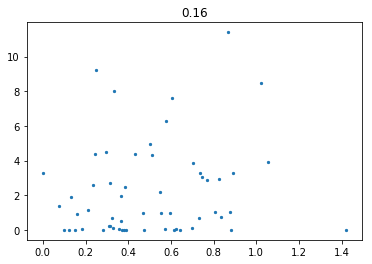

In [19]:
real_min_idx = np.argmin(real_pvalues)
real_R = '{0:.2}'.format(pearsonr(X_matrix[:,real_min_idx], y_pheno[:,0])[0])
plt.scatter(X_matrix[:,real_min_idx], y_pheno[:,0], s=5)
plt.title(real_R)


In [12]:
from scipy.stats import pearsonr

In [15]:
pearsonr(X_matrix[:,np.argmin(real_pvalues)] , y_pheno[:,0])

(-0.16463266, 0.22103400296227177)

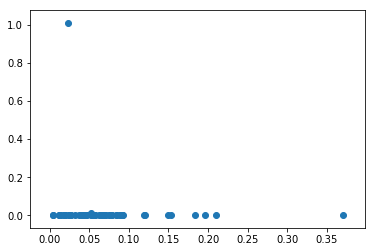

In [6]:
plt.scatter(X_matrix[:,np.argmin(real_pvalues)], y_pheno[:,266])

# Minimum pvalue over all components

In [4]:
real_pvalues_by_compenent = {}
shuffle_pvalues_by_compenent = {}
for i in range(1023):
    if i % 50 == 0:
        print (i)
    real_pvalues = np.array(pickle.load(open('../data/processed/associations/lung_associations_pvalues/{}_pvalues_shuffle0_filterlimit1.py'.format(i),'rb')))
    shuffled_pvalues = np.array(pickle.load(open('../data/processed/associations/lung_associations_pvalues/{}_pvalues_shuffle1_filterlimit1.py'.format(i),'rb')))
    real_pvalues_by_compenent[i] = real_pvalues
    shuffle_pvalues_by_compenent[i] = shuffled_pvalues
    


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


In [13]:
min_real_pvalue = min([min(real_pvalues_by_compenent[i]) for i in real_pvalues_by_compenent.keys()])

In [21]:
sorted_min_pvalue_idx = np.argsort([min(real_pvalues_by_compenent[i]) for i in real_pvalues_by_compenent.keys()])

In [25]:
sorted_min_pvalue_idx[0:10]

array([958, 290, 546, 512, 266, 497, 827, 281,  13, 236])

In [19]:
[min(real_pvalues_by_compenent[i]) for i in real_pvalues_by_compenent.keys()].index(min_real_pvalue)

958

In [12]:
min([min(shuffle_pvalues_by_compenent[i]) for i in shuffle_pvalues_by_compenent.keys()])

2.1347289244490569e-13